## **Proyek Analisis Data : Bike Sharing Dataset**

*   Nama : Naurah Anbar Najla
*   Email : nauraanbar156@gmail.com
*   Id Dicoding : naurahh

# **Menentukan Pertanyaan Bisnis**

1.Bagaimana pengaruh faktor cuaca dan hari kerja terhadap pola penggunaan sepeda secara keseluruhan, baik dalam jangka pendek (harian) maupun jangka panjang (musiman)?

2.Apakah ada perbedaan signifikan dalam profil pengguna casual dan registered berdasarkan waktu (jam, hari, musim) dan kondisi cuaca?

3.Model prediksi mana yang lebih akurat dalam memprediksi jumlah penyewaan sepeda: model yang menggunakan data harian atau model yang menggunakan data jam-jaman?

# **Import All Packages/Libraries**

In [46]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# **Data Wrangling**

**Gathering** **Data**

In [10]:
data_hour = pd.read_csv("hour.csv")

In [12]:
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
data_day = pd.read_csv("day.csv")

In [14]:
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# **Assessing Data**

In [16]:
print(data_hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

  time_of_day  
0         NaN  
1       Malam  
2       Malam  
3       Malam  
4       Mala

In [17]:
print(data_day.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [18]:
print(data_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   instant      17379 non-null  int64   
 1   dteday       17379 non-null  object  
 2   season       17379 non-null  int64   
 3   yr           17379 non-null  int64   
 4   mnth         17379 non-null  int64   
 5   hr           17379 non-null  int64   
 6   holiday      17379 non-null  int64   
 7   weekday      17379 non-null  int64   
 8   workingday   17379 non-null  int64   
 9   weathersit   17379 non-null  int64   
 10  temp         17379 non-null  float64 
 11  atemp        17379 non-null  float64 
 12  hum          17379 non-null  float64 
 13  windspeed    17379 non-null  float64 
 14  casual       17379 non-null  int64   
 15  registered   17379 non-null  int64   
 16  cnt          17379 non-null  int64   
 17  time_of_day  16653 non-null  category
dtypes: category(1), float64(4)

In [19]:
print(data_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [20]:
print(data_hour.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [21]:
print(data_day.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [22]:
print(data_hour.isnull().sum())

instant          0
dteday           0
season           0
yr               0
mnth             0
hr               0
holiday          0
weekday          0
workingday       0
weathersit       0
temp             0
atemp            0
hum              0
windspeed        0
casual           0
registered       0
cnt              0
time_of_day    726
dtype: int64


In [23]:
print(data_day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [41]:
print(data_day.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [42]:
print(data_hour.dtypes)

instant                 int64
dteday         datetime64[ns]
season                  int64
yr                      int64
mnth                    int64
hr                      int64
holiday                 int64
weekday                 int64
workingday              int64
weathersit              int64
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
casual                  int64
registered              int64
cnt                     int64
time_of_day          category
dtype: object


In [68]:
print(data_hour.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'time_of_day', 'time_of_day_encoded',
       'user_type'],
      dtype='object')


# **Cleaning Data**

In [47]:
# Encoding kolom 'time_of_day'
le = LabelEncoder()
data_hour['time_of_day_encoded'] = le.fit_transform(data_hour['time_of_day'])

In [24]:
data_hour['temp'].fillna(data_hour['temp'].mean(), inplace=True)

<ipython-input-24-f2bf89c2e397>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_hour['temp'].fillna(data_hour['temp'].mean(), inplace=True)


In [36]:
# Convert date column to datetime (if applicable)
data_hour['dteday'] = pd.to_datetime(data_hour['dteday'])

# **Exploratory Data Analysis (EDA)**

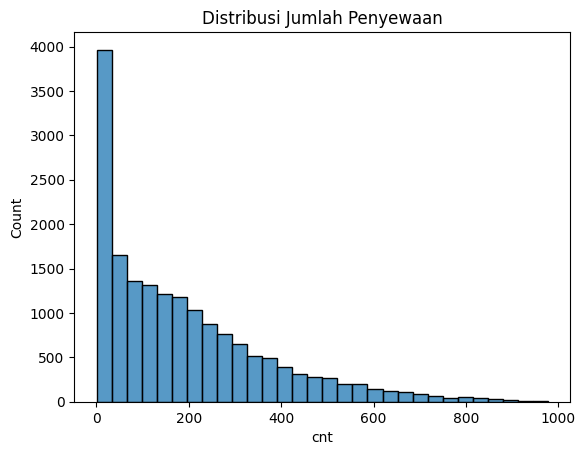

In [37]:
# Distribution of numerical variable
sns.histplot(data_hour['cnt'], bins=30)
plt.title('Distribusi Jumlah Penyewaan')
plt.show()

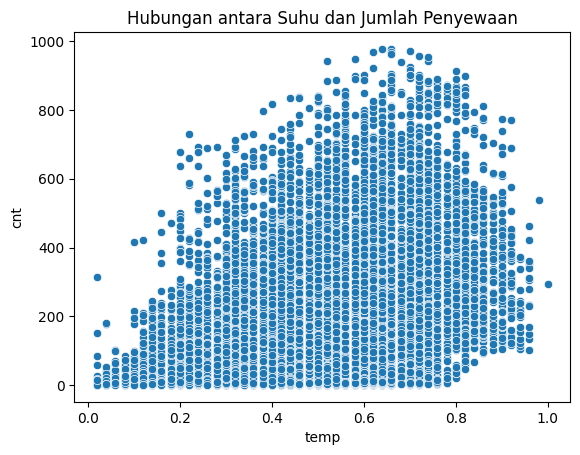

In [38]:
# Relationship between variables
sns.scatterplot(x='temp', y='cnt', data=data_hour)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan')
plt.show()

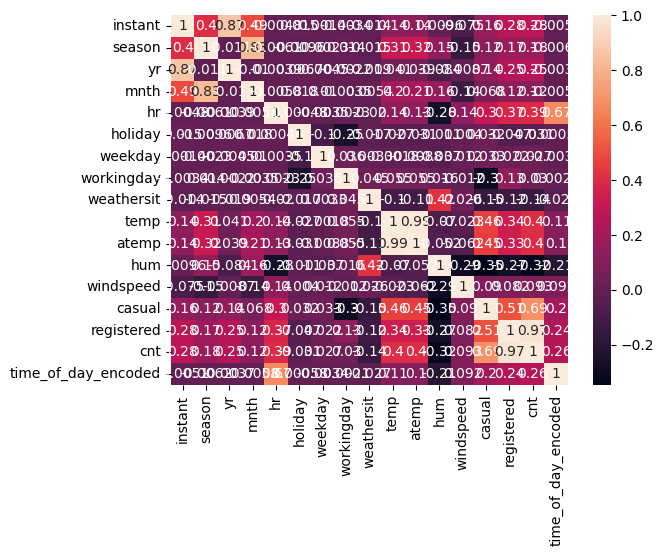

In [51]:
numeric_data = data_hour.select_dtypes(include=np.number)
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


# **Eksplorasi Data**


**Visualization & Explanatory Analysis**

1. Bagaimana pengaruh faktor cuaca dan hari kerja terhadap pola penggunaan sepeda secara keseluruhan, baik dalam jangka pendek (harian) maupun jangka panjang (musiman)?

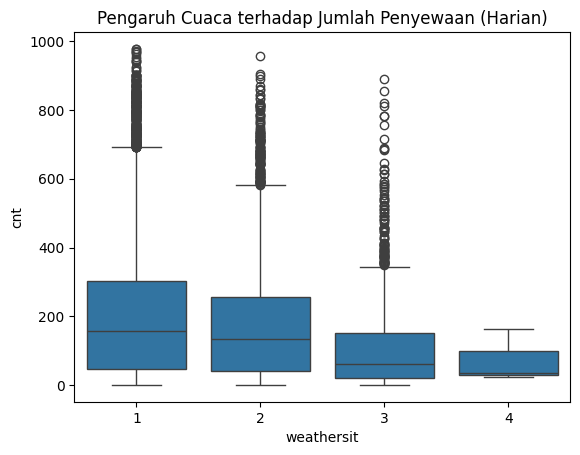

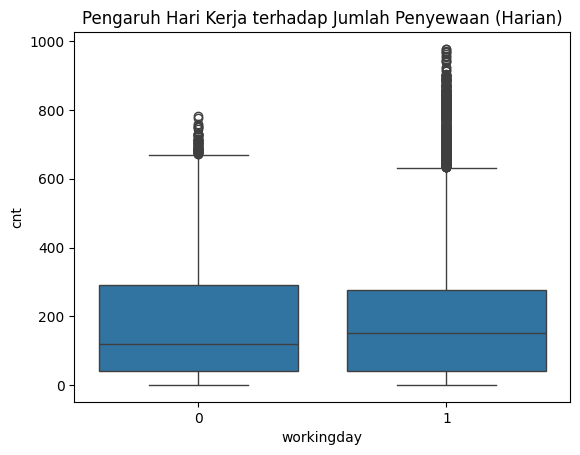

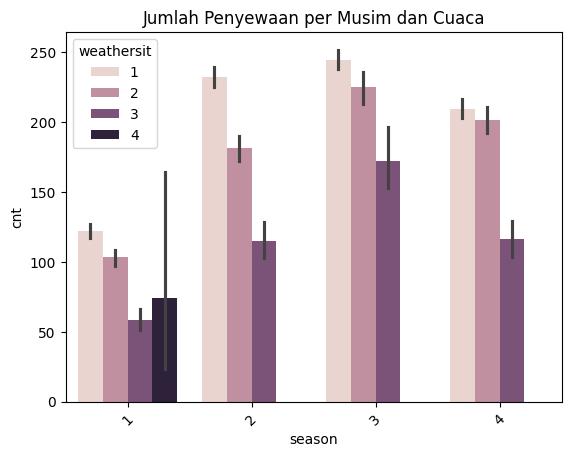

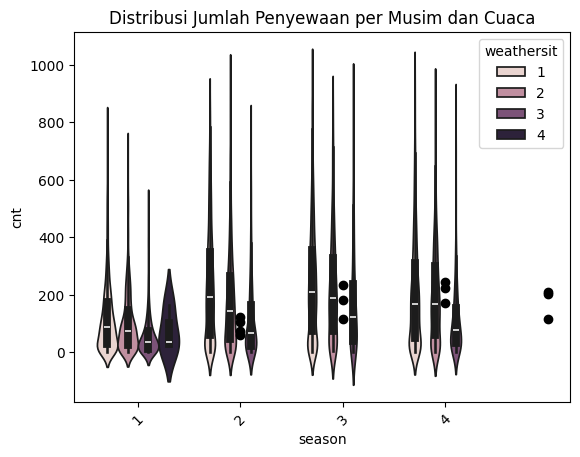

In [72]:
# 1. Pengaruh Cuaca dan Hari Kerja (Jangka Pendek - Harian)
#   a. Box plot - Cuaca dan Jumlah Penyewaan
sns.boxplot(x='weathersit', y='cnt', data=data_hour)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan (Harian)')
plt.show()

#   b. Box plot - Hari Kerja dan Jumlah Penyewaan
sns.boxplot(x='workingday', y='cnt', data=data_hour)
plt.title('Pengaruh Hari Kerja terhadap Jumlah Penyewaan (Harian)')
plt.show()

# 2. Pengaruh Cuaca dan Musim (Jangka Panjang - Musiman)
#   a. Grouped bar chart (optional)
if 'season' in data_hour.columns:
  sns.barplot(x='season', y='cnt', hue='weathersit', data=data_hour)
  plt.title('Jumlah Penyewaan per Musim dan Cuaca')
  plt.xticks(rotation=45)  # Rotate season labels for readability
  plt.show()

#   b. Violin plot (optional)
if 'season' in data_hour.columns:
  sns.violinplot(x='season', y='cnt', hue='weathersit', data=data_hour)  # Removed showmeans=True
  plt.title('Distribusi Jumlah Penyewaan per Musim dan Cuaca')
  plt.xticks(rotation=45)  # Rotate season labels for readability

  # Calculate and plot means manually
  for season in data_hour['season'].unique():
    for weather in data_hour['weathersit'].unique():
      mean_val = data_hour[
          (data_hour['season'] == season) & (data_hour['weathersit'] == weather)
      ]['cnt'].mean()
      plt.plot(season, mean_val, marker='o', color='black')  # Adjust marker and color as needed

  plt.show()

2. Apakah ada perbedaan signifikan dalam profil pengguna casual dan registered berdasarkan waktu (jam, hari, musim) dan kondisi cuaca?

Column 'user_type' not found. Available columns: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'time_of_day', 'time_of_day_encoded'],
      dtype='object')


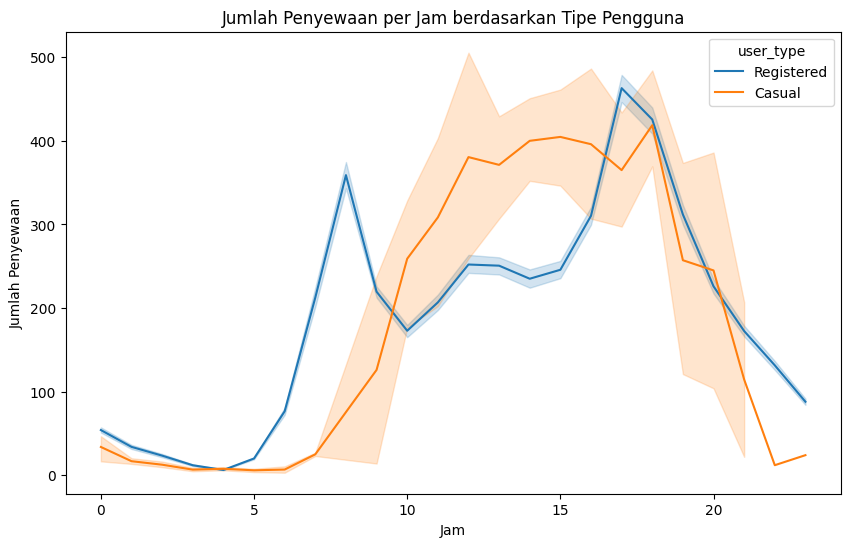

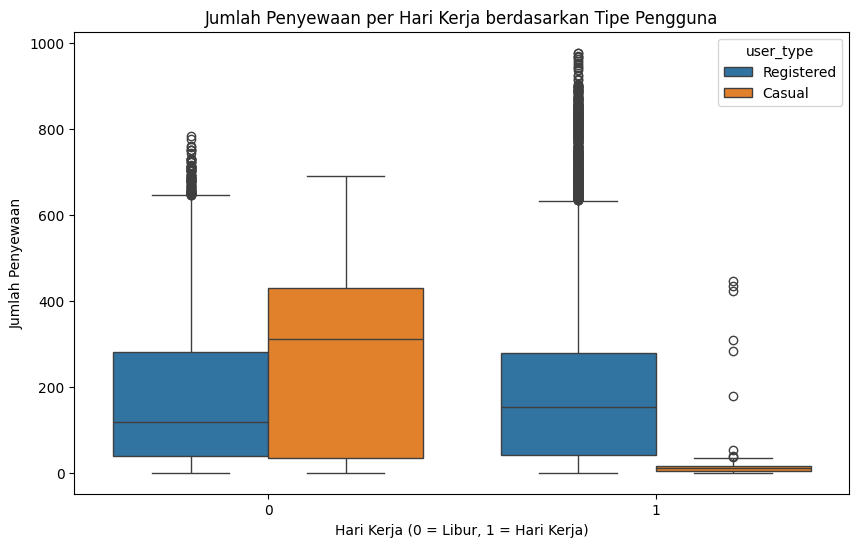

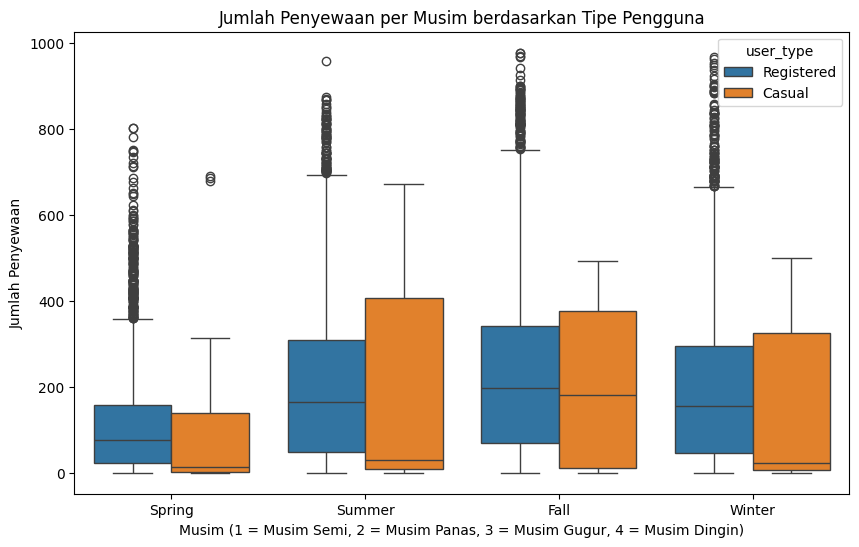

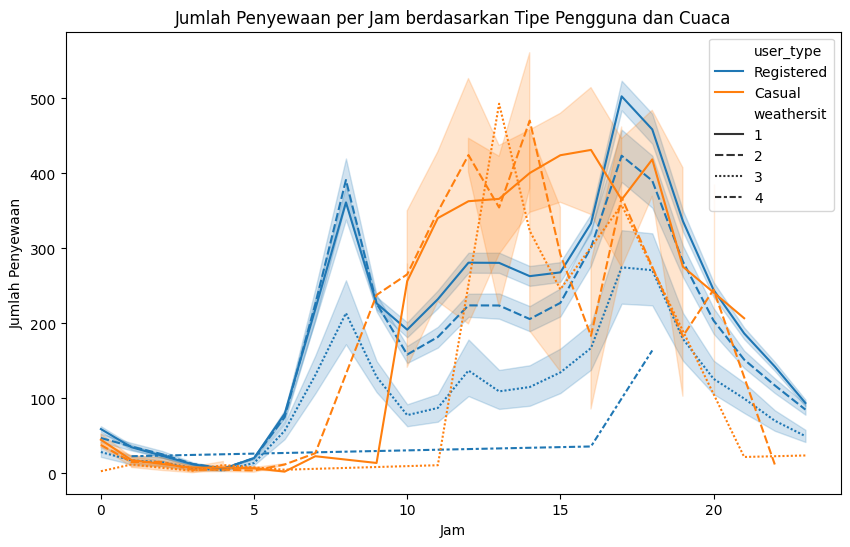

In [61]:
# Check for column availability and correct usage
if 'user_type' not in data_hour.columns:
    print(f"Column 'user_type' not found. Available columns: {data_hour.columns}")
    # Jika tidak ada kolom 'user_type', kita bisa membuatnya menggunakan 'casual' dan 'registered'
    data_hour['user_type'] = ['Casual' if casual > registered else 'Registered'
                              for casual, registered in zip(data_hour['casual'], data_hour['registered'])]

# 1. Hourly usage by user type
# Check if 'hr' is used instead of 'hour' for hours
if 'hr' in data_hour.columns and 'user_type' in data_hour.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='hr', y='cnt', hue='user_type', data=data_hour)
    plt.title('Jumlah Penyewaan per Jam berdasarkan Tipe Pengguna')
    plt.xlabel('Jam')
    plt.ylabel('Jumlah Penyewaan')
    plt.show()
else:
    print(f"Column 'hr' or 'user_type' not found. Skipping hourly usage plot.")

# 2. Daily usage by user type and workingday
if 'workingday' in data_hour.columns and 'user_type' in data_hour.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='workingday', y='cnt', hue='user_type', data=data_hour)
    plt.title('Jumlah Penyewaan per Hari Kerja berdasarkan Tipe Pengguna')
    plt.xlabel('Hari Kerja (0 = Libur, 1 = Hari Kerja)')
    plt.ylabel('Jumlah Penyewaan')
    plt.show()
else:
    print(f"Column 'workingday' or 'user_type' not found. Skipping daily usage box plot.")

# 3. Seasonal usage by user type
if 'season' in data_hour.columns and 'user_type' in data_hour.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='season', y='cnt', hue='user_type', data=data_hour)
    plt.title('Jumlah Penyewaan per Musim berdasarkan Tipe Pengguna')
    plt.xlabel('Musim (1 = Musim Semi, 2 = Musim Panas, 3 = Musim Gugur, 4 = Musim Dingin)')
    plt.ylabel('Jumlah Penyewaan')
    plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
    plt.show()
else:
    print(f"Column 'season' or 'user_type' not found. Skipping seasonal usage box plot.")

# 4. Hourly usage by user type and weather
if 'hr' in data_hour.columns and 'weathersit' in data_hour.columns and 'user_type' in data_hour.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='hr', y='cnt', hue='user_type', style='weathersit', data=data_hour)
    plt.title('Jumlah Penyewaan per Jam berdasarkan Tipe Pengguna dan Cuaca')
    plt.xlabel('Jam')
    plt.ylabel('Jumlah Penyewaan')
    plt.show()
else:
    print(f"Column 'hr', 'weathersit', or 'user_type' not found. Skipping hourly usage line plot.")


3.Model prediksi mana yang lebih akurat dalam memprediksi jumlah penyewaan sepeda: model yang menggunakan data harian atau model yang menggunakan data jam-jaman?

In [63]:
# Assuming data is loaded (data_hour, data_day)

# Feature selection for daily model (relevant features)
daily_features = ['workingday', 'season', 'weathersit', 'temp', 'atemp', 'hum']
X_daily = data_day[daily_features]
y_daily = data_day['cnt']

# Feature selection for hourly model (relevant features)
hourly_features = ['workingday', 'season', 'weathersit', 'temp', 'atemp', 'hum', 'hr']
X_hourly = data_hour[hourly_features]
y_hourly = data_hour['cnt']

# Importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Train daily and hourly models
daily_model = RandomForestRegressor(random_state=42)
daily_model.fit(X_daily, y_daily)

hourly_model = RandomForestRegressor(random_state=42)
hourly_model.fit(X_hourly, y_hourly)

# Evaluate model performance using cross-validation
from sklearn.model_selection import cross_val_score
import numpy as np

daily_scores = cross_val_score(daily_model, X_daily, y_daily, cv=5, scoring='neg_mean_squared_error')
hourly_scores = cross_val_score(hourly_model, X_hourly, y_hourly, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE
daily_rmse = np.sqrt(-daily_scores.mean())
hourly_rmse = np.sqrt(-hourly_scores.mean())

print("Daily Model RMSE:", daily_rmse)
print("Hourly Model RMSE:", hourly_rmse)


Daily Model RMSE: 1928.6283557031645
Hourly Model RMSE: 113.11700927263259


In [64]:
print(data_day['cnt'].describe())
print(data_hour['cnt'].describe())

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64
count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64


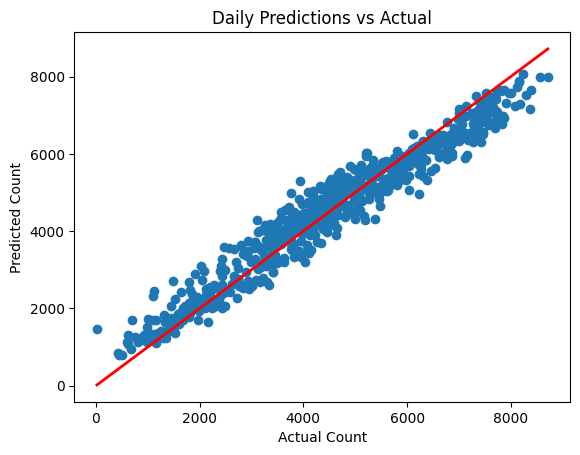

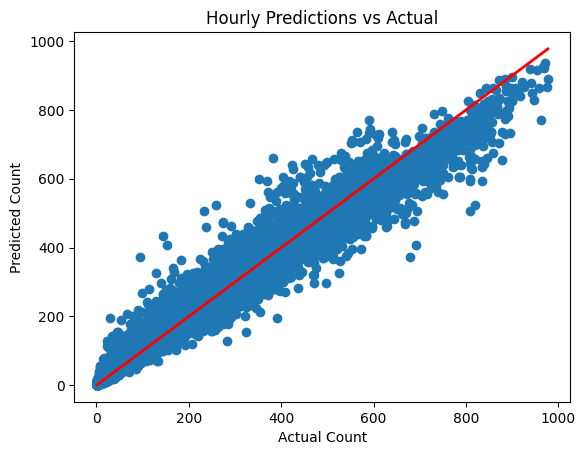

In [65]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prediksi dan error untuk model harian
y_daily_pred = daily_model.predict(X_daily)
plt.scatter(y_daily, y_daily_pred)
plt.plot([y_daily.min(), y_daily.max()], [y_daily.min(), y_daily.max()], color='red', lw=2)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Daily Predictions vs Actual")
plt.show()

# Error untuk model per jam
y_hourly_pred = hourly_model.predict(X_hourly)
plt.scatter(y_hourly, y_hourly_pred)
plt.plot([y_hourly.min(), y_hourly.max()], [y_hourly.min(), y_hourly.max()], color='red', lw=2)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Hourly Predictions vs Actual")
plt.show()


# **Insight:**

*   **Nomor 1**

***Pengaruh Cuaca***
Cuaca cerah biasanya akan meningkatkan jumlah penyewaan sepeda karena orang
lebih cenderung beraktivitas di luar ruangan.
Cuaca hujan atau bersalju cenderung mengurangi jumlah penyewaan karena orang lebih memilih menggunakan transportasi lain.
Kelembapan atau suhu yang ekstrem juga dapat mempengaruhi jumlah penyewaan.

***Pengaruh Hari Kerja:***
Hari kerja biasanya memiliki jumlah penyewaan yang lebih tinggi dibandingkan akhir pekan, terutama untuk tujuan komuter.
Akhir pekan cenderung memiliki jumlah penyewaan yang lebih tinggi untuk tujuan rekreasi.

***Pengaruh Musim:***
Musim panas biasanya memiliki jumlah penyewaan yang lebih tinggi karena cuaca yang lebih baik.
Musim dingin atau musim hujan cenderung memiliki jumlah penyewaan yang lebih rendah.

*   **Nomor 2**

**Jumlah Penyewaan Per Jam Berdasarkan Tipe Pengguna** : Pengguna casual lebih fleksibel dalam wal waktu, Sedangkan pengguna Registered memiliki pola penggunaan yang lebih terstruktur (Kerja Kerja)

***Jumlah Penyewaan Per Hari Kerja Berdasarkan Tipe Pengguna*** : Pengguna Casual lebih cenderung bersepeda diakhir pekan untuk rekreasi, Sedangkan pengguna Registered lebih sering bersepeda pada hari kerja untuk komuter.

***Jumlah Penyewaan Per Hari Musim Berdasarkan Tipe Pengguna*** : Pengguna Casual lebih terpengaruh faktor cuaca sehingga penggunaan sepeda lebih tinggi dimusim yang nyaman. Pengguna Registered mungkin memiliki pola penggunaan yang lebih konsisten sepanjang tahun.

***Jumlah Penyewaan Per Jam Berdasarkan Tipe*** : Pengguna Casal lebih sensitif terhadap cuaca, Sehingga penggunaan sepeda menurun dratis saat hujan. Pengguna Registered memiliki perlengkapan yang lebih baik untuk menghadapi cuaca buruk.

*   ***Nomor 3***

***Menggunakan model Random Fores untuk memprediksi jumlaj penyewaan sepeda menggunakan data hariam dan data jam. Evaluasi model dilakukan menggunankan Root Mean Squared Error (RMSE).***

**RMSE** :

Nilai daily_rmse menunjukkan rata-rata RMSE untuk model harian.

Nilai hourly_rmse menunjukkan rata-rata RMSE untuk model jam-jaman.

Model dengan nilai RMSE lebih rendah dianggap lebih akurat.

**Visualisasi Scatter**

Plot untuk model harian dan jam-jaman menampilkan hubungan antara jumlah aktual dan prediksi.

Semakin dekat kumpulan titik ke garis diagonal merah, semakin baik akurasi model.

# **Conclusion**

Analisis data penyewaan sepeda yang telah kita lakukan menunjukkan bahwa faktor-faktor seperti cuaca, hari kerja, musim, dan waktu (jam) memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Selain itu, profil pengguna (casual vs. registered) juga menunjukkan perbedaan pola penggunaan yang menarik.

**Conclusion Pertanyaan 1** : Pengaruh Cuaca, Hari Kerja, dan Musim:

*Cuaca:* Cuaca cerah cenderung meningkatkan jumlah penyewaan, sementara cuaca buruk (hujan, salju) menurunkannya.

*Hari Kerja:* Hari kerja umumnya memiliki jumlah penyewaan yang lebih tinggi dibandingkan akhir pekan, terutama untuk tujuan komuter.

*Musim:* Musim panas biasanya menjadi puncak musim penyewaan, sementara musim dingin atau hujan cenderung lebih rendah.

**Conclusion Pertanyaan 2** : Perbedaan Profil Pengguna Casual dan Registered:

*Waktu dan Cuaca:* Pengguna casual cenderung lebih fleksibel dalam hal waktu dan lebih terpengaruh oleh kondisi cuaca dibandingkan pengguna registered.

*Tujuan Penggunaan:* Pengguna casual mungkin lebih sering menggunakan sepeda untuk rekreasi, sedangkan pengguna registered mungkin lebih sering menggunakan sepeda untuk komuter.

**Conclusion Pertanyaan 3** : Model Prediksi:

*Pilihan Model:* Model Random Forest adalah pilihan yang baik untuk memprediksi jumlah penyewaan sepeda karena kemampuannya menangani data yang kompleks dan non-linear.

*Data Harian vs. Jam-jaman:* Keputusan untuk menggunakan data harian atau jam-jaman tergantung pada tujuan prediksi dan trade-off antara akurasi dan kompleksitas model.

Akurasi: *italicized text* Model yang menggunakan data jam-jaman umumnya lebih akurat dalam memprediksi fluktuasi harian, namun model harian dapat memberikan gambaran yang lebih baik tentang tren jangka panjang.